In [1]:
import scipy.io
import numpy as np
from scipy import optimize
mat = scipy.io.loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
del mat

## Function

In [36]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def cost(theta_val, x_val, y_val,lambd=0):
    count = y_val.shape[0]
    h = sigmoid(theta_val.T @ x_val.T)
    pos_cost = - y_val * np.log(h)
    neg_cost = - (1-y_val) * np.log(1-h)
    theta_x = np.array([i for i in theta_val.flatten()])
    theta_x[0] = 0
    cost_p1 = np.sum(pos_cost + neg_cost)/count
    cost_p2 = lambd/(2*count) * np.sum(theta_x**2)
    return np.array(cost_p1+cost_p2).reshape((1,1))

def grad_cost(theta_val, x_val, y_val,lambd=0):
    count = y_val.shape[0]
    theta_val = theta_val.reshape((-1,1))
    err = sigmoid(theta_val.T @ x_val.T).T-y_val
    theta_x = np.array([i for i in theta_val.flatten()])
    theta_x[0] = 0
    return ((x_val.T @ err)/count).flatten() + (lambd/count) * theta_x

## Plot 100 random image

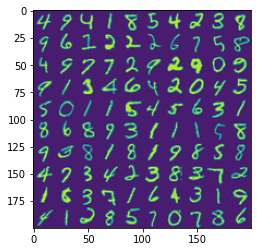

In [205]:
import matplotlib.pyplot as plt
plot_sqr = 10
img = np.zeros((200,200))
img_index = np.random.randint(0,high=X.shape[0],size=plot_sqr**2)
img_tmp = [X[i,:].reshape((20,-1)).T for i in img_index]
for i in range(plot_sqr):
    img[:,i*20:(i+1)*20,] =(np.array(img_tmp[i*10:(i+1)*10]).reshape((-1,20)))
plt.imshow(img)

## Training data using scipy.optimize

In [132]:
X_a = np.c_[np.array([1]*5000),X]
thetaval = np.array([0]*401*10).reshape(-1,10).astype('float64')
for i in range(10):
    thetainit = np.array([0]*401).reshape(-1,1).astype('float64')
    if i == 0:
        num = 10
    else:
        num = i
    print(f'Training number {num}',end='')
    optimizer = optimize.minimize(fun=cost, x0=thetainit,args = (X_a,(y==num)*1,0), method ='L-BFGS-B', jac=grad_cost)
    print(' complete')
    thetaval[:,i] = optimizer.x

Training number 10
Training number 10 Complete
Training number 1
Training number 1 Complete
Training number 2
Training number 2 Complete
Training number 3
Training number 3 Complete
Training number 4
Training number 4 Complete
Training number 5
Training number 5 Complete
Training number 6
Training number 6 Complete
Training number 7
Training number 7 Complete
Training number 8
Training number 8 Complete
Training number 9
Training number 9 Complete


In [201]:
def predict(test_val:int,plot=False):
    if plot:
        plt.imshow(X[test_val].reshape(20,20).T)
    predict_list = sigmoid(thetaval.T @ X_a[test_val,:])
    img_res = np.argmax(predict_list)
    img_conf = np.max(predict_list)*100
    print(f'predicted num is {img_res} with confidence of {img_conf:.2f}%')

## Predict random image 

Image at index 4868 is 9 and predicted num is 4 with confidence of 13.11%
Image at index 2128 is 4 and predicted num is 4 with confidence of 23.07%
Image at index 3604 is 7 and predicted num is 7 with confidence of 24.53%
Image at index 602 is 1 and predicted num is 1 with confidence of 35.89%
Image at index 1275 is 2 and predicted num is 2 with confidence of 29.85%
Image at index 1739 is 3 and predicted num is 8 with confidence of 10.15%
Image at index 2384 is 4 and predicted num is 9 with confidence of 15.38%
Image at index 1952 is 3 and predicted num is 3 with confidence of 15.89%
Image at index 4441 is 8 and predicted num is 8 with confidence of 7.75%
Image at index 3902 is 7 and predicted num is 0 with confidence of 37.27%
Image at index 4082 is 8 and predicted num is 8 with confidence of 10.73%
Image at index 1761 is 3 and predicted num is 3 with confidence of 19.07%
Image at index 2360 is 4 and predicted num is 4 with confidence of 16.52%
Image at index 4851 is 9 and predicted n

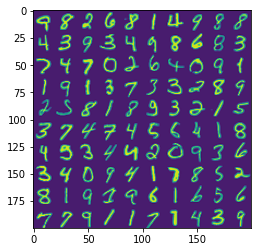

In [202]:
import matplotlib.pyplot as plt
plot_sqr = 10
img = np.zeros((200,200))
img_index = np.random.randint(0,high=X.shape[0],size=plot_sqr**2)
img_tmp = [X[i,:].reshape((20,-1)).T for i in img_index]
for i in range(plot_sqr):
    img[:,i*20:(i+1)*20,] =(np.array(img_tmp[i*10:(i+1)*10]).reshape((-1,20)))
plt.imshow(img)
for i in img_index:
    print(f'Image at index {i.item()} is {y[i].item()} and',end=' ')
    predict(i)

## Predict single image

predicted num is 4 with confidence of 13.11%


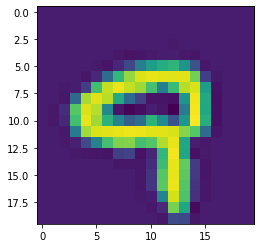

In [204]:
predict(4868 ,True)